In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
print(pd.__version__)

2.0.2


# Visualization overview
## pyplot module 
The pyplot module provides a high-level interface for creating and customizing plots. It offers a wide range of functions and methods to create various types of plots, such as line plots, bar plots, scatter plots, and more. These plots help in better understanding the data, identifying trends and correlations, and presenting data analysis and visualizations.

By using the pyplot module from Matplotlib, Pandas enables users to create visually appealing and informative plots directly from their data.

## Other visualization libraries
Other popular visualization libraries include Altair, Bokeh, seaborn, plotnine, IPython Vega, Plotly, and more. These libraries offer modern and aesthetically pleasing styles for data visualization. Each library has its own unique features and strengths.

## Colors representation

In visualization, colors can be represented using the same CSS notation as in CSS stylesheets. You can use CSS color names or valid CSS color values to represent colors.

The 17 standard color names are: aqua, black, blue, fuchsia, gray, green, lime, maroon, navy, olive, orange, purple, red, silver, teal, white, yellow.

Additionally, you can represent colors using other formats such as hexadecimal (e.g., #FF0000 for red), RGB (e.g., rgb(255, 0, 0) for red), or RGBA (e.g., rgba(255, 0, 0, 0.5) for semi-transparent red).

For references: https://htmlcolorcodes.com/

## Notebook issues and solutions 
##### Graph size and correctly display Chinese
```python
plt.rcParams['figure.figsize'] = (15.0, 8.0) # fix the display size
plt.rcParams['font.family'] = ['sans-serif'] # Display Chinese
plt.rcParams['font.sans-serif'] = ['SimHei'] # Display Chinese
plt.rcParams['axes.unicode_minus'] = False # Display minus sign
plt.style.use('seaborn-whitegrid') # Set graph style
plt.style.available  # Return a list of all available styples
```
##### Control the page size:
We can use `CSS` styles to customize the appearance. Here are the code snippets for adjusting the page width and setting the background color to white:
```python
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
```
##### To set the background color to white:
```python
display(HTML("<style>#notebook_panel { background: #ffffff; }</style>"))

```
##### Embed an image in the notebook

We can use the `base64` encoding of the image and reference it in HTML.

```python
import base64
f = open('df_pivot.png', 'rb')
bs64 = base64.b64encode(f.read()).decode()
img_by_html = f"<img src='data:image/png;base64,{bs64}'/>"

# Check it in Notebook
from IPython.display import display, HTML
display(HTML(img_by_html))
```


# `Plot()`

Pandas provides the plot() method to quickly and conveniently visualize data from Series and DataFrame. It is a wrapper around `matplotlib.axes.Axes.plot`. When executed, it generates an image and displays it directly in the notebook.

## Basics 
The `plot()` function in Pandas provides the default line plot, which is the most commonly used and fundamental visualization. It is sufficient to meet 80% of our daily needs.
```python
df.plot()
s.plot()

```
We can also add additional method calls after `plot()` to create different types of plots. Each plot type has its own requirements on the data structure. Here are some examples:

```python

df.plot.line()  # Line plot
df.plot.bar()  # Bar plot
df.plot.barh()  # Horizontal bar plot
df.plot.hist()  # Histogram
df.plot.box()  # Box plot
df.plot.kde()  # Kernel Density Estimation (KDE) plot
df.plot.density()  # Same as df.plot.kde()
df.plot.area()  # Area plot
df.plot.pie()  # Pie chart
df.plot.scatter()  # Scatter plot
df.plot.hexbin()  # Hexbin plot

```

## Series 
When using `plot()` with a Series, the x-axis will be the index of the Series, and the y-axis will be the corresponding values of the index.

<AxesSubplot: >

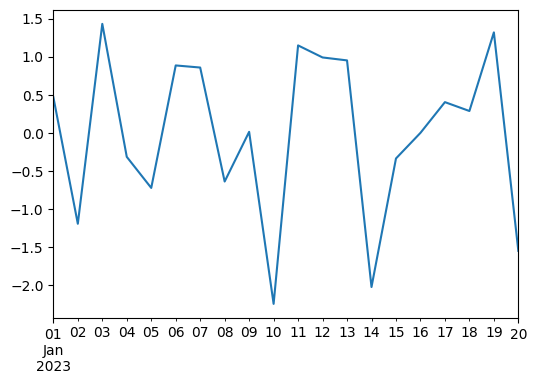

In [2]:
np.random.seed(1234)
ts = pd.Series(np.random.randn(20),
               index = pd.date_range('1/1/2023', periods = 20)
              )

ts.plot()

## DataFrame 
When using plot on a DataFrame, the x-axis represents the index of the DataFrame, and the y-axis represents the values corresponding to that index for multiple columns.

In [3]:
np.random.seed(1234)
df = pd.DataFrame(data = np.random.randn(7, 4),
                 index = pd.date_range('07-01-2023', periods = 7),
                 columns = list('ABCD')
                 )
df

,A,B,C,D
2023-07-01,0.471435,-1.190976,1.432707,-0.312652
2023-07-02,-0.720589,0.887163,0.859588,-0.636524
2023-07-03,0.015696,-2.242685,1.150036,0.991946
2023-07-04,0.953324,-2.021255,-0.334077,0.002118
2023-07-05,0.405453,0.289092,1.321158,-1.546906
2023-07-06,-0.202646,-0.655969,0.193421,0.553439
2023-07-07,1.318152,-0.469305,0.675554,-1.817027


<AxesSubplot: >

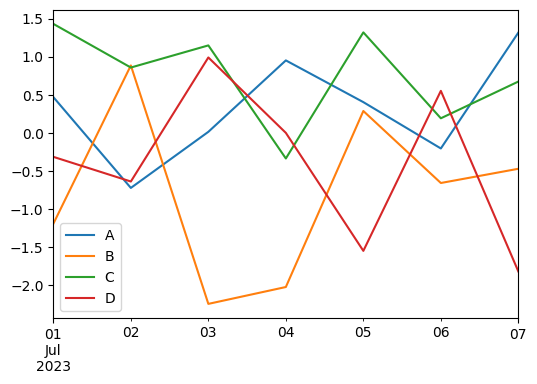

In [4]:
df.plot()

##### When plotting a DataFrame, you can specify the columns to use for the x-axis and y-axis.

In [5]:
df2 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df2['A'] = pd.Series(list(range(len(df))))
df2.head()

,B,C,A
0,-0.183109,1.058969,0.0
1,-0.580949,1.396407,1.0
2,0.466630,2.442345,2.0
3,1.330347,2.320254,3.0
4,1.455060,1.997459,4.0


<AxesSubplot: xlabel='A'>

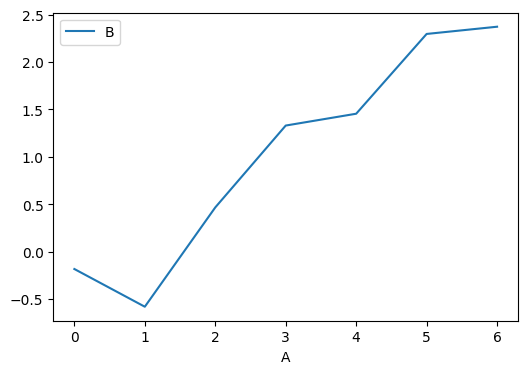

In [6]:
df2.plot(x = 'A', y = 'B') # Specify the columns 

<AxesSubplot: xlabel='A'>

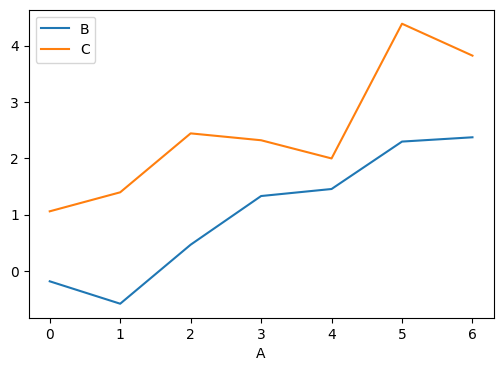

In [7]:
df2.plot(x = 'A', y = ['B','C'])

In [8]:
df = pd.DataFrame({'Name': ['Liver', 'Arry', 'Ack', 'Eorge', 'Oah'], 
                   'Team': list('ABCDE'),
                   'Q1': np.random.normal(loc = 85, scale = 8, size = 5),
                   'Q2': np.random.normal(loc = 70, scale = 10, size = 5),
                   'Q3': np.random.normal(loc = 90, scale = 2, size = 5),
                   'Q4': np.random.normal(loc = 77, scale = 6, size = 5)                
                  }

)
df 

,Name,Team,Q1,Q2,Q3,Q4
0,Liver,A,88.157524,90.536833,90.652376,83.074837
1,Arry,B,87.525809,75.294050,88.810208,79.029613
2,Ack,C,77.646054,74.286595,90.853844,81.476532
3,Eorge,D,67.022754,64.925504,89.870402,78.078637
4,Oah,E,82.652169,75.305786,89.385317,71.495760


## `plot()` parameters

<AxesSubplot: xlabel='Name'>

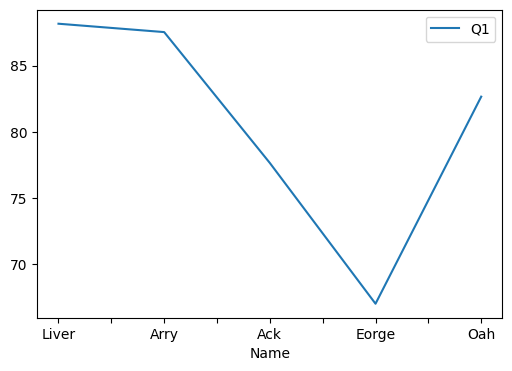

In [9]:
df.plot('Name', 'Q1')

<AxesSubplot: xlabel='Name'>

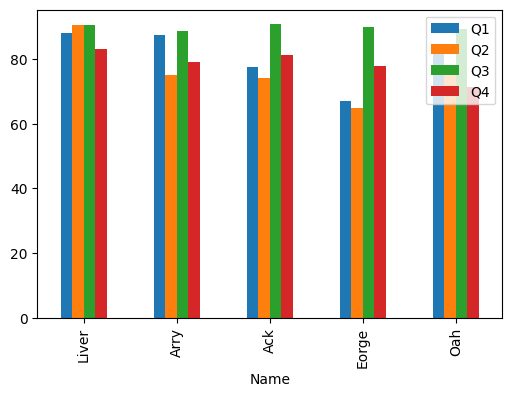

In [10]:
df.plot(kind='bar', x='Name', y = ['Q1', 'Q2', 'Q3', 'Q4'])

### Add a title

<AxesSubplot: title={'center': 'my plot'}>

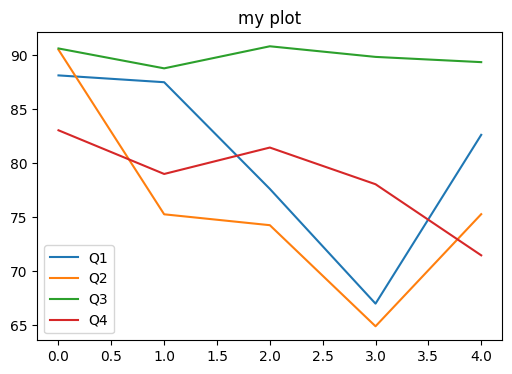

In [11]:
df[:10].plot(title="my plot")

### Add fontsize

<AxesSubplot: >

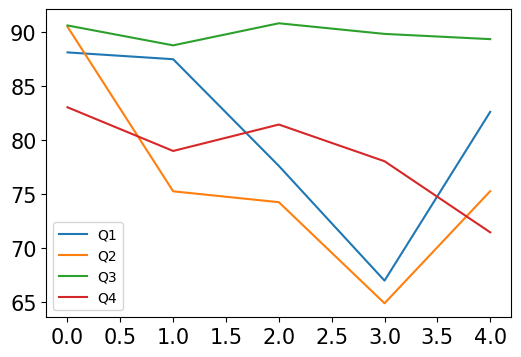

In [12]:
df[:5].plot(fontsize=15)

### DIfferent line styles 
```python
df[:5].plot(style=':')  # Dotted line
df[:5].plot(style='-.')  # Dash-dot line
df[:5].plot(style='--')  # Dashed line
df[:5].plot(style='-')  # Solid line (default)
df[:5].plot(style='.')  # Dotted markers
df[:5].plot(style='*-')  # Solid line with star markers
df[:5].plot(style='^-')  # Solid line with triangle markers
```



<AxesSubplot: xlabel='Name'>

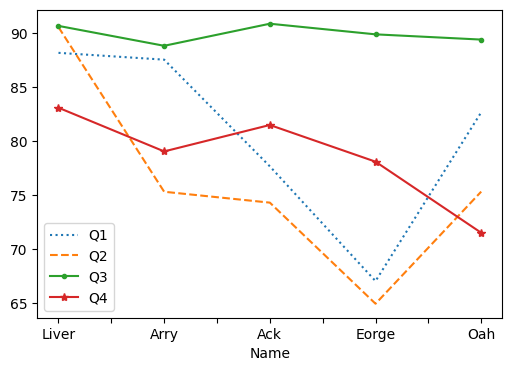

In [13]:
df[:5].set_index('Name').plot(style=[':', '--', '.-', '*-'])

### Add gridlines 

<AxesSubplot: >

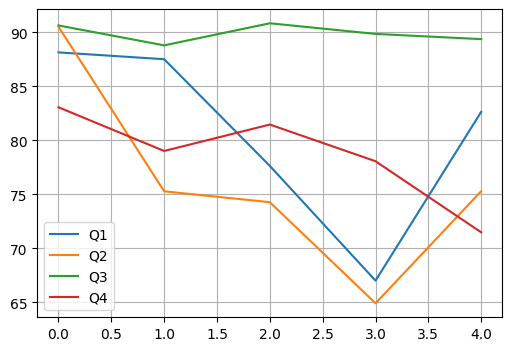

In [14]:
df[:5].plot(grid = True)

### `colormap`
The `colormap` parameter allows you to specify the color scheme for your plot.

<AxesSubplot: xlabel='Name'>

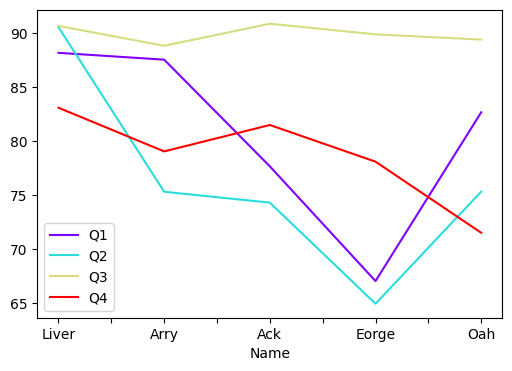

In [15]:
df[:5].set_index('Name').plot(colormap = 'rainbow')

## Line Chart

A line chart connects various data points with line segments to form a figure. It can express the trend of a piece of data, which is generally related to time.


The default figure of Plot is a line chart, so you can omit the specific line method in `df.plot.line()`.

We can directly call plot on a DataFrame to generate a line chart, where the x-axis is the index, and other numeric type columns are the lines on the y-axi

<AxesSubplot: xlabel='Name'>

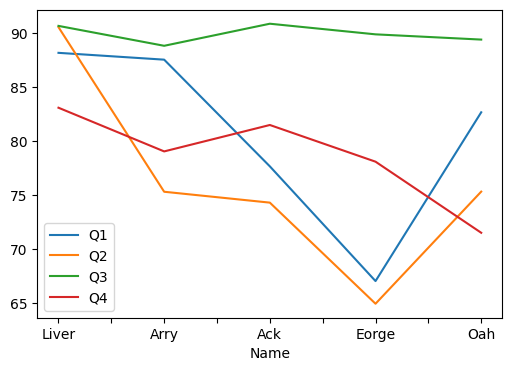

In [16]:
df.loc[:10].set_index('Name').plot() 

## Subplots
If there are multiple lines in a line chart, we can use subplots to separate them into multiple subplots.

array([[<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >]], dtype=object)

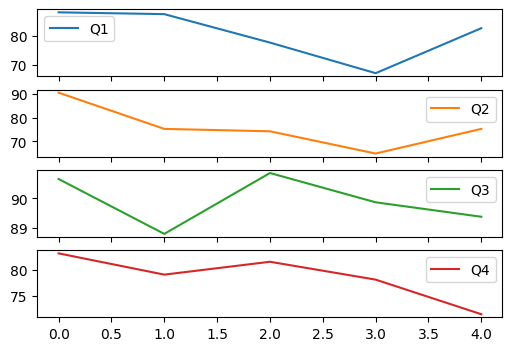

In [17]:
df.plot.line(subplots = True, layout=(4,1))

## Pie Chart
Pie charts are widely used in various fields to represent the proportion of different categories, comparing these categories through the size of the radians. Pie charts divide a pie into multiple sectors based on the proportion of each category. The entire pie represents the total quantity of data, each sector (arc) represents the proportion of that category to the total, and the sum of all sectors (arcs) equals 100%.

Creating Pie Charts
You can create pie charts using `DataFrame.plot.pie()` or `Series.plot.pie()`. If our data contains any `NaNs`, they will be automatically filled with 0. If there are any negative values in your data, a `ValueError` will be raised.

<AxesSubplot: ylabel='series'>

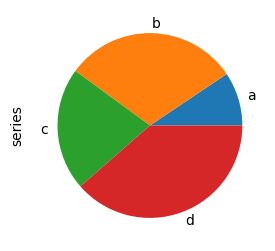

In [18]:
np.random.seed(1234)
s = pd.Series(np.random.rand(4),
              index = ['a', 'b', 'c', 'd'], name = 'series')
s.plot.pie(figsize=(3, 3))

In [19]:
np.random.seed(1234)
df = pd.DataFrame( np.random.rand(4, 2),
                  index=['a', 'b', 'c', 'd'],
                  columns=['x', 'y'])
df['pct_x'] = df['x'].apply(lambda x: x/df['x'].sum() * 100)
df['pct_y'] = df['y'].apply(lambda x: x/df['x'].sum() * 100)
df 

,x,y,pct_x,pct_y
a,0.191519,0.622109,11.361506,36.905349
b,0.437728,0.785359,25.967316,46.589816
c,0.779976,0.272593,46.270493,16.171007
d,0.276464,0.801872,16.400685,47.569451


<AxesSubplot: ylabel='x'>

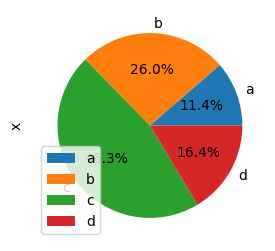

In [20]:
df.plot.pie(y ='x', figsize = (3,3), autopct = '%1.1f%%' )

array([<AxesSubplot: ylabel='x'>, <AxesSubplot: ylabel='y'>,
       <AxesSubplot: ylabel='pct_x'>, <AxesSubplot: ylabel='pct_y'>],
      dtype=object)

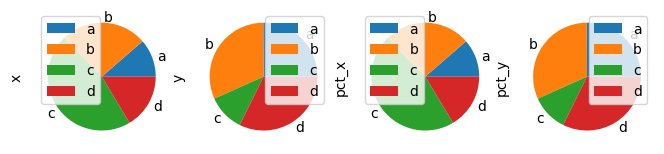

In [21]:
df.plot.pie(subplots = True, figsize = (8, 4))

array([<AxesSubplot: ylabel='x'>, <AxesSubplot: ylabel='y'>,
       <AxesSubplot: ylabel='pct_x'>, <AxesSubplot: ylabel='pct_y'>],
      dtype=object)

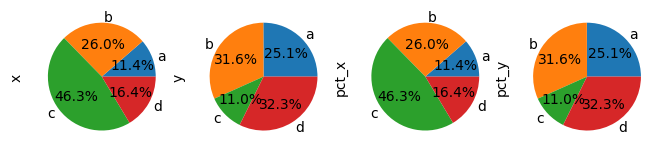

In [22]:
df.plot.pie(subplots=True, figsize=(8, 4), legend=False, autopct = '%1.1f%%' )

### Other commonly used parameters

In [23]:
s

a    0.191519
b    0.622109
c    0.437728
d    0.785359
Name: series, dtype: float64

<AxesSubplot: ylabel='series'>

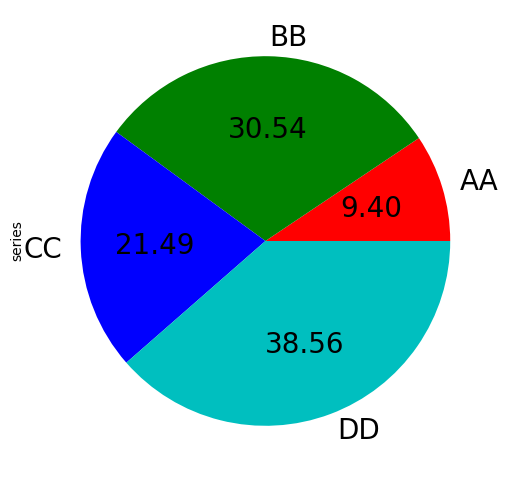

In [24]:
s.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], # labels
           colors=['r', 'g', 'b', 'c'], # Colors
           autopct='%.2f', # Formatting
           fontsize=20, # size
           figsize=(6, 6) # Figure size
          )

## Bar chart 
Bar charts are very useful for visualizing and comparing data. With pandas DataFrame, we can easily create a bar chart using the `plot.bar()` method. By default, the index of the DataFrame will be taken as the x-axis and the numerical columns will be taken as the y-axis.

<AxesSubplot: >

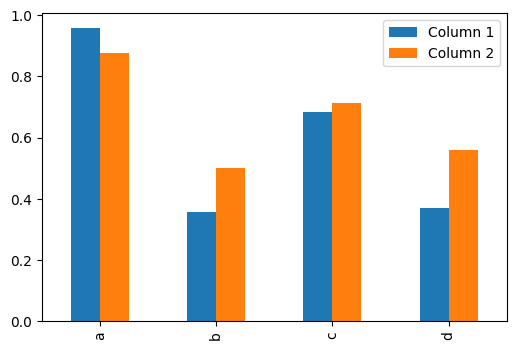

In [25]:
df = pd.DataFrame(np.random.rand(4, 2), 
                  index=['a', 'b', 'c', 'd'], 
                  columns=['Column 1', 'Column 2'])

df.plot.bar()

<AxesSubplot: >

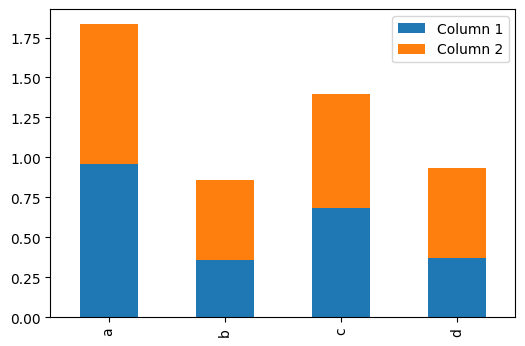

In [26]:
df.plot.bar(stacked = True)

<AxesSubplot: >

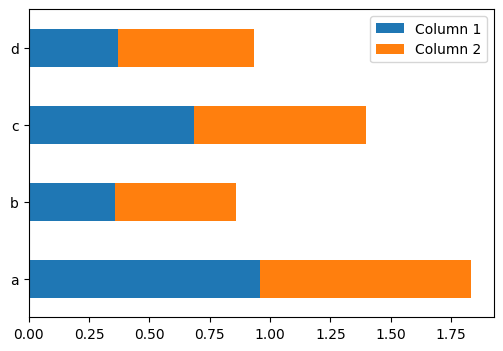

In [27]:
df.plot.barh(stacked = True)

## Histograms 
Histograms are a great tool for visualizing the distribution of a dataset. In pandas, we can create a histogram using the `plot.hist()` method.

A histogram represents the frequency distribution of continuous variables. Unlike bar charts that have gaps between bars, histograms have no gaps between bars. The data is divided into bins, each bin is of different height. The height of the bin represents the number of observations that fall into that bin.

In [28]:
df2 = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1},
                  columns = ['a', 'b', 'c'])
df2.head()

,a,b,c
0,0.665923,-0.845081,-2.691415
1,1.002118,-0.281439,0.054737
2,1.405453,1.719957,-1.501993
3,1.289092,-1.077500,-1.294687
4,2.321158,-1.378282,-1.501388


##### When creating a histogram, the default number of bins is 10 (bins=10). The alpha parameter controls the transparency of the color, and can take a value between 0 (completely transparent) and 1 (completely opaque).


<AxesSubplot: ylabel='Frequency'>

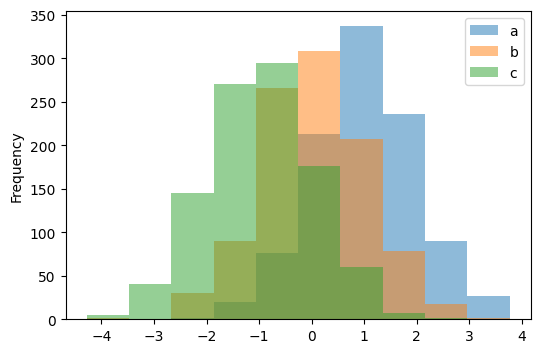

In [29]:
df2.plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

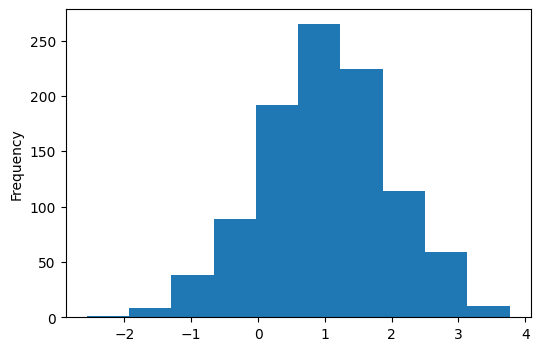

In [30]:
df2.a.plot.hist()

<AxesSubplot: ylabel='Frequency'>

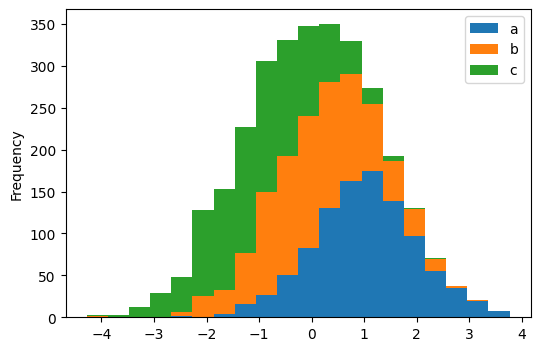

In [31]:
# stacked 
df2.plot.hist(stacked = True, bins = 20)

##### You can also use the `df.hist()` method directly to draw a histogram for each column in your DataFrame.

array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'b'}>],
       [<AxesSubplot: title={'center': 'c'}>, <AxesSubplot: >]],
      dtype=object)

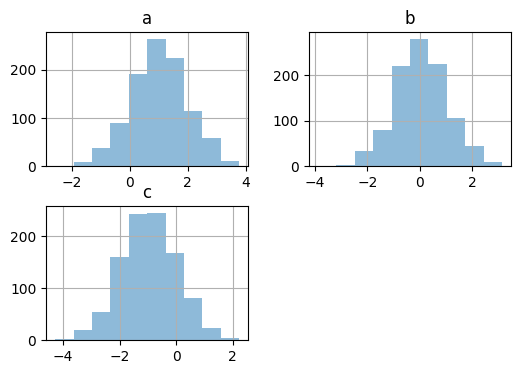

In [32]:
df2.hist(alpha=0.5)

<AxesSubplot: >

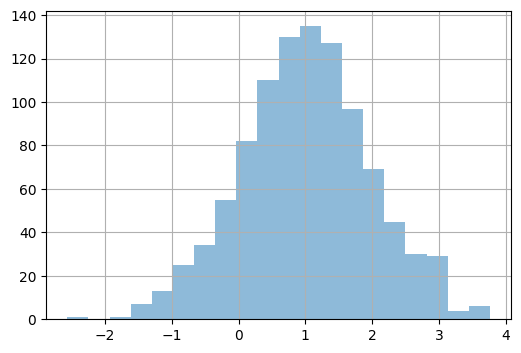

In [33]:
# Draw a signle column, and specify the bin numbers
df2.a.hist(bins = 20, alpha = 0.5)

In [34]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randint(1, 7, 6000),
                  columns = ['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
df 

,one,two
0,4,7
1,6,12
2,5,8
3,5,9
4,1,5
...,...,...
5995,6,11
5996,3,8
5997,1,2
5998,2,5


<AxesSubplot: ylabel='Frequency'>

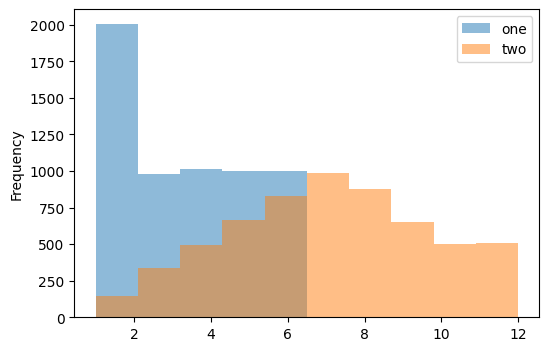

In [35]:
df.plot.hist(alpha = 0.5)

## Box plot

A Box Plot (or Box-and-Whisker Plot) is a graphical representation of a dataset that includes various properties such as the median, quartiles, maximum and minimum values, and potential outliers. In pandas, we can create a box plot using `Series.plot.box()`, `DataFrame.plot.box()`, or `DataFrame.boxplot()` methods.

Uses:

From a box plot, we can observe:

* Key values of a dataset: median, maximum, minimum, etc.
* Whether there are outliers in the data set, and the specific values of these outliers.
* Whether the data is symmetrical.
* The dispersion and concentration of the data.
* Whether the data is skewed and its direction of skewness.

In [36]:
df = pd.DataFrame(np.random.rand(10, 5),
                  columns = ['A', 'B', 'C', 'D', 'E'])
df.head()

,A,B,C,D,E
0,0.857493,0.819474,0.608703,0.158371,0.259145
1,0.593116,0.221348,0.499592,0.753813,0.329944
2,0.787104,0.964732,0.933659,0.917678,0.413751
3,0.058058,0.245721,0.809373,0.650664,0.707702
4,0.344385,0.278668,0.308437,0.621926,0.180219


<AxesSubplot: >

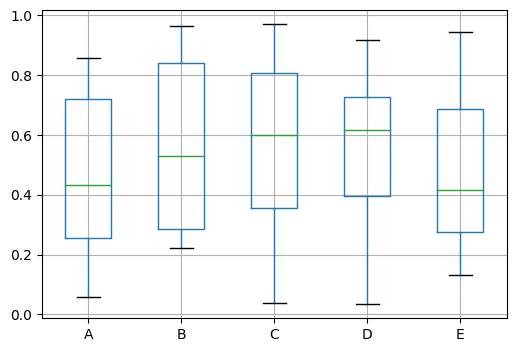

In [37]:
df.boxplot()

<AxesSubplot: >

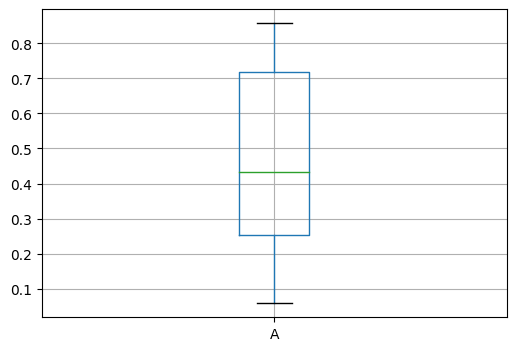

In [38]:
df.boxplot('A')

### Customize the color 
In a box plot, you can customize the color of different components using a dictionary. In your code, color is a dictionary that sets the colors for the boxes, whiskers, medians, and caps.

In [39]:
color = {'boxes': 'Red',     # Color of the box body
         'whiskers': 'Orange', # Color of the connecting lines
         'medians': 'Blue',   # Color of the median
         'caps': 'Gray'}      # Color of the extreme values

<AxesSubplot: >

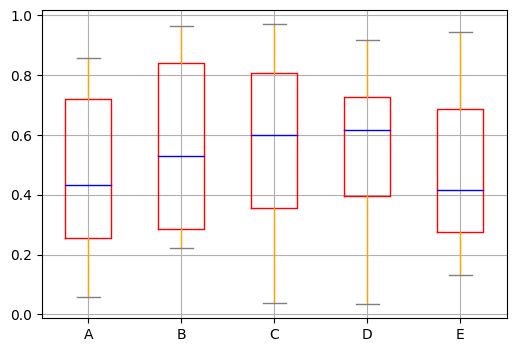

In [40]:
df.boxplot(color = color, sym = 'r+')

<AxesSubplot: >

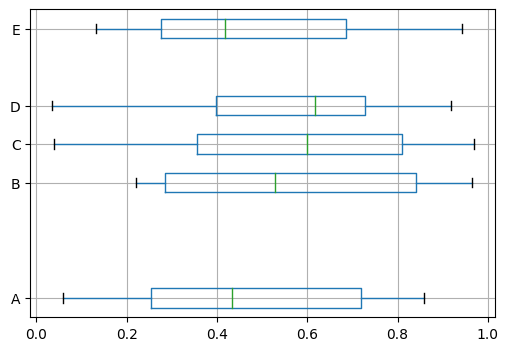

In [41]:
df.boxplot(vert = False, positions = [1, 4, 5, 6, 8]) # positions control positions

## Area Chart 

also known as an Area Plot, is a type of plot where the area between the line segments and the x-axis is filled with color or texture. These filled areas are known as 'areas', and the color filling can help highlight trend information. It's important to note that the color should have a certain degree of transparency. Transparency can help users observe the overlap between different series, while a lack of transparency can lead to series overlapping and reduce the information that can be observed.

By default, area charts are stacked. To generate a stacked area chart, each column must contain all positive or all negative values.

If your input data contains `NaN` values, they will be automatically filled with 0. If you want to drop or fill with different values, use `dataframe.dropna()` or `dataframe.fillna()` before calling the plot.

##### Creating Area Chart:

You can create an area chart using `Series.plot.area()` or `DataFrame.plot.area()`. By default, the x-axis represents the index, and the y-axis represents the values or all numerical columns.


<AxesSubplot: >

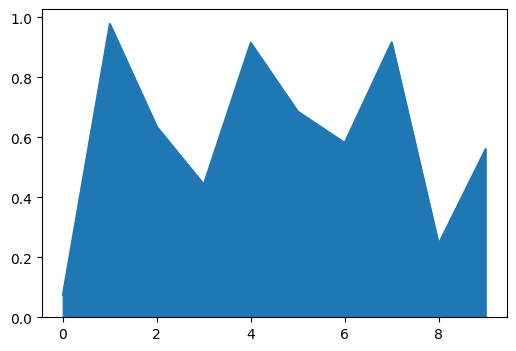

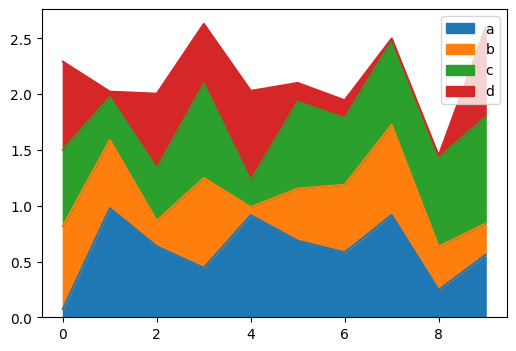

In [42]:
df = pd.DataFrame(np.random.rand(10, 4), columns = list('abcd'))
df.a.plot.area()
df.plot.area()

##### In an area chart, the plots are stacked by default. If we want to create an unstacked area chart, we can do so by passing `stacked=False` as a parameter to the plot function. Unless specified, the transparency (alpha) value will be set to 0.5.

<AxesSubplot: >

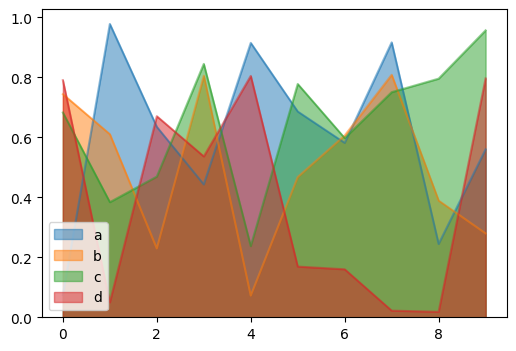

In [43]:
df.plot.area(stacked = False)

<AxesSubplot: >

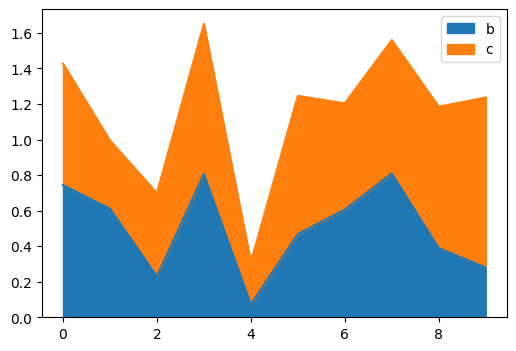

In [44]:
# Specify the columns 
df.plot.area(y = ['b', 'c'])

## scatter plot, 

also known as an X-Y graph, displays all the data in the form of points on a Cartesian coordinate system, showing the degree of mutual influence between variables. The position of a point is determined by the values of the variables.

The Meaning of the Graph:

By observing the distribution of data points on the scatter plot, we can infer the correlation between variables. If there is no mutual relationship between the variables, it will be displayed on the scatter plot as randomly distributed discrete points. If there is some correlation, then most of the data points will be relatively dense and present some kind of trend. The correlation of the data mainly includes: positive correlation (both variable values increase simultaneously), negative correlation (one variable value increases while the other decreases), unrelated, linearly related, exponentially related, etc. The general distribution on the scatter plot is shown in the following figure. Those points that are far from the point cluster are called outliers or abnormal points.

Scatter plots are often used in conjunction with regression lines (the line that most accurately passes through all points) for summarizing and analyzing existing data to make predictive analyses.

<AxesSubplot: xlabel='a', ylabel='b'>

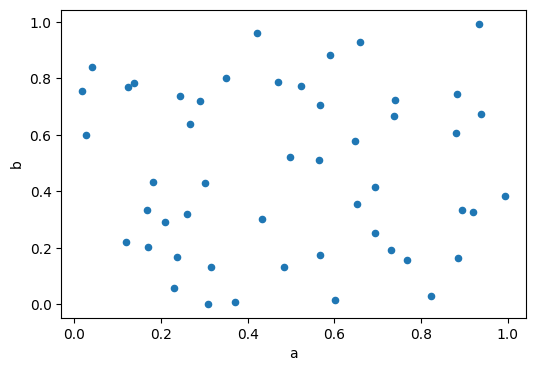

In [45]:
df = pd.DataFrame(np.random.rand(50, 4),
                  columns =list('abcd'))

df.plot.scatter(x = 'a', y ='b')

##### To plot multiple columns of data on a single axis, we can repeat the plot method on the target axis. It's advisable to specify color and label keywords to distinguish each group.

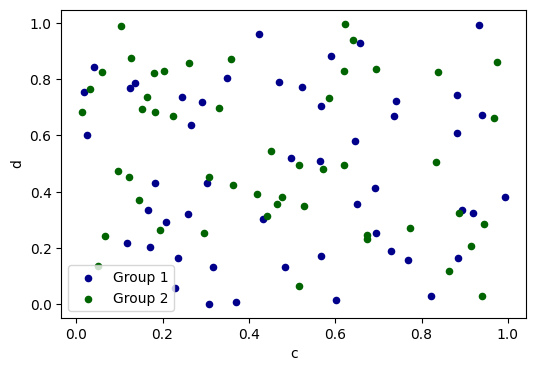

In [46]:
ax = df.plot.scatter(x ='a', y ='b', color = 'DarkBlue', label = 'Group 1');
df.plot.scatter(x = 'c', y='d', color = 'DarkGreen', label = 'Group 2', ax = ax);

##### The `c` parameter can be used to specify the color of the points in a plot. This can be useful in a scatter plot where the color of each point can represent some third variable.

<AxesSubplot: xlabel='a', ylabel='b'>

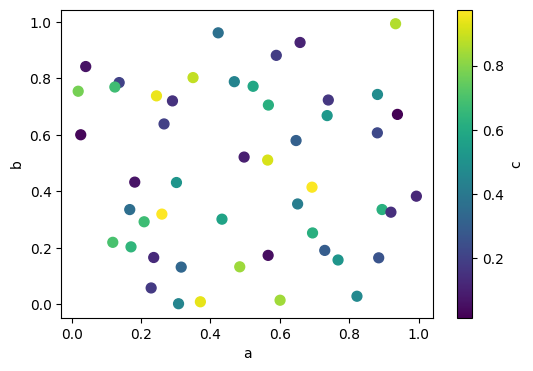

In [47]:
df.plot.scatter(x = 'a', y = 'b', c = 'c', s = 50) # size for point size, column c as color

The c parameter in a scatter plot can be set to:

* A string, RGB or RGBA code, such as 'red' or '#a98d19'.
* A sequence of colors, a list that corresponds to the color of each point.
* A column name or position, the values of which will be used to color the markers according to a color map.

The `colorbar=True` option adds a vertical color bar to the right side of the current axes or figure. This color bar shows the current color map and indicates the mapping from data values to colors.

<AxesSubplot: xlabel='a', ylabel='b'>

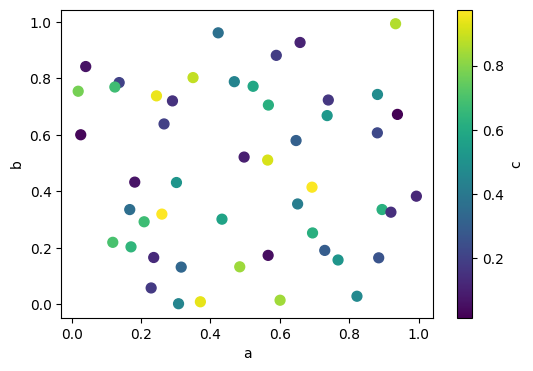

In [48]:
df.plot.scatter(x = 'a', y = 'b', c = 'c', s = 50, cmap = 'viridis', colorbar = True)

## Hexbin plot (Hexagonal Binning) 
Hexbin plot is a type of plot that uses hexagons as the main element of the statistical chart. It's a special kind of chart that is an extension of a scatter plot and also incorporates features of histograms and heatmaps.

Creation Method:

We can create a hexbin plot with `DataFrame.plot.hexbin()`. If your data is too dense to plot each point individually, a hexbin plot can be used as an alternative to a scatter plot.

<AxesSubplot: xlabel='A', ylabel='B'>

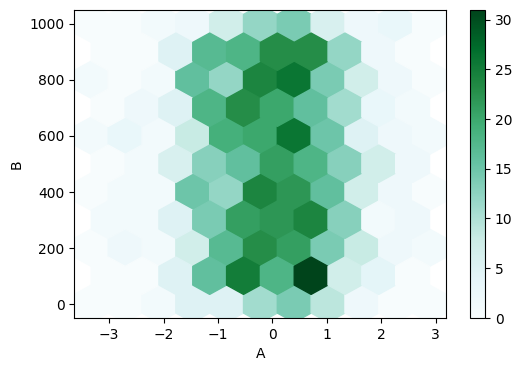

In [49]:
df = pd.DataFrame(np.random.randn(1000, 2), columns = ["A", "B"])
df["B"] = df["B"] + np.arange(1000)
df.plot.hexbin(x = "A", y = "B", gridsize = 10)


In Python, the `hexbin` method can take parameters C and `reduce_C_function` to allow for more customized binning.

<AxesSubplot: xlabel='a', ylabel='b'>

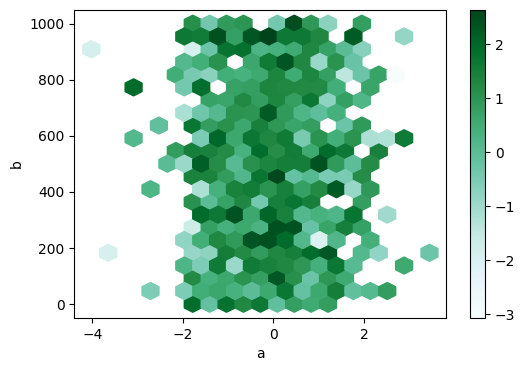

In [50]:
df = pd.DataFrame(np.random.randn(1000, 3), columns=["a", "b", "z"])
df["b"] = df["b"] + np.arange(1000)

df.plot.hexbin(x = "a", y = "b", C = "z", reduce_C_function = np.max, gridsize = 20)

Here's what the C and reduce_C_function parameters do:

* C: This parameter specifies the value at each (x, y) point.
* reduce_C_function: This is a function that reduces all the values in each bin to a single number (like mean, max, sum, std etc.). By default, this is `numpy.mean`. If C is specified, the values in the column are accumulated according to reduce_C_function for color mapping.
So, in simple terms, with these parameters you can control what values are displayed in the `hexbins`. By default, it's the count of points, but with these options, you can set it to be any aggregated function of some column values.